## Notebook 2 : *Data Preprocessing* 
This notebook is for feature engineering. 

---------------------------------------

## Table of contents 

### 1. [Data preparation](#data_preparation)
 - 1.1 Load Data
 - 1.2 Define metadata
 - 1.3 Define functions
 
### 2. [Feature engineering](#engineering)
 - 2.1 Remove some features
 - 2.2 Encoding
   - 2.2.1 Binary encoding
   - 2.2.2 Numeric encoding
   - 2.2.3 Frequency encoding
   - 2.2.4 Factorizing
   - 2.2.5 Category encoding
 - 2.3 Correlation matrix
 - 2.4 Creating new features

---

### 3. [Second EDA ](#eda)
  - 3.1 Checking the quality of features
  - 3.2 Finally removed features

---

## Data preparation
<a id="data_preparation"></a>
## 1.1 Load Data

In [1]:
import pandas as pd
from pandas import Series
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
from datetime import datetime 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
df_train = pd.read_csv('C:/Users/dj.lee/Desktop/data/train/train.csv',dtype=dtypes)
print('Train data:', df_train.shape)

df_test = pd.read_csv('C:/Users/dj.lee/Desktop/data/test/test.csv',dtype=dtypes)
print('Test data:', df_test.shape)

# Add timestamps
datedict = np.load('C:/Users/dj.lee/Desktop/data/timestamp/AvSigVersionTimestamps.npy')[()]
df_train['Date'] = df_train['AvSigVersion'].map(datedict)
df_test['Date'] = df_test['AvSigVersion'].map(datedict)

Train data: (8921483, 83)
Test data: (7853253, 82)


## 1.2 Define metadata

In [4]:
level = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'binary',
        'RtpStateBitfield':                                     'category',
        'IsSxsPassiveMode':                                     'binary',
        'DefaultBrowsersIdentifier':                            'category',
        'AVProductStatesIdentifier':                            'category',

        'AVProductsInstalled':                                  'category',
        'AVProductsEnabled':                                    'category',
        'HasTpm':                                               'binary',
        'CountryIdentifier':                                    'category',
        'CityIdentifier':                                       'category',
        'OrganizationIdentifier':                               'category',
        'GeoNameIdentifier':                                    'category',
        'LocaleEnglishNameIdentifier':                          'category',
        'Platform':                                             'category',
        'Processor':                                            'category',
    
        'OsVer':                                                'category',
        'OsBuild':                                              'category',
        'OsSuite':                                              'category',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'binary',
        'AutoSampleOptIn':                                      'binary',
        'PuaMode':                                              'category',
        'SMode':                                                'category',
            
        'IeVerIdentifier':                                      'category',
        'SmartScreen':                                          'category',
        'Firewall':                                             'binary',
        'UacLuaenable':                                         'category',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'category',
        'Census_OEMModelIdentifier':                            'category',
        'Census_ProcessorCoreCount':                            'category',
        'Census_ProcessorManufacturerIdentifier':               'category',
        
        'Census_ProcessorModelIdentifier':                      'category',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'numeric',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'numeric',
        'Census_HasOpticalDiskDrive':                           'binary',
        'Census_TotalPhysicalRAM':                              'category',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'numeric',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'numeric',
        
        'Census_InternalPrimaryDisplayResolutionVertical':      'category',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'category',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'category',
        'Census_OSBuildRevision':                               'category',
        'Census_OSEdition':                                     'category', 
    
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'category',
        'Census_OSUILocaleIdentifier':                          'category',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'binary',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'binary',
        'Census_IsFlightsDisabled':                             'binary',
        
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'binary',
        'Census_FirmwareManufacturerIdentifier':                'category',
        'Census_FirmwareVersionIdentifier':                     'category',
        'Census_IsSecureBootEnabled':                           'binary',
        'Census_IsWIMBootEnabled':                              'binary',
        'Census_IsVirtualDevice':                               'binary',
        'Census_IsTouchEnabled':                                'binary',
        'Census_IsPenCapable':                                  'binary',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'binary',
        
        'Wdft_IsGamer':                                         'category',
        'Wdft_RegionIdentifier':                                'category',
        'HasDetections':                                        'target',
        'Date':                                                 'datetime'
        }

In [5]:
level_of_features =  level.values() 

data = []
for f in df_train.columns:
    
    # Defining the role
    if f == 'HasDetections':
        role = 'target'
    elif f == 'MachineIdentifier':
        role = 'id'
    else:
        role = 'input'
         
    # Initialize keep to all variables except for 'MachineIdentifier'
    keep = True
    if f == 'MachineIdentifier':
        keep = False
    
    # Defining the data type 
    dtype = df_train[f].dtype
  
    # Defining whether the feature is new or not
    new = False

    f_dict = {
        'feature': f,
        'role': role,
        'keep': keep,
        'dtype': dtype,
        'new': new
    }
    data.append(f_dict)
    
    
metadata = pd.DataFrame(data, columns=['feature', 'role', 'keep','dtype', 'new'])
metadata.set_index('feature', inplace=True)

# Defining the level 
metadata['level'] = level_of_features

In [6]:
metadata.head()

,role,keep,dtype,new,level
feature,,,,,
MachineIdentifier,id,False,category,False,category
ProductName,input,True,category,False,category
EngineVersion,input,True,category,False,category
AppVersion,input,True,category,False,category
AvSigVersion,input,True,category,False,category


## 1.3 Define functions

In [7]:
import calendar, math

def plot_category_feature(df, feature_name, c, sort):
    df[feature_name] = df[feature_name].astype(str)
    detection_rate = df[[feature_name,'HasDetections']].groupby([feature_name]).mean()
    cart_count = df[feature_name].value_counts(dropna=False)
    cart_perc  = df[feature_name].value_counts(dropna=False)/len(df[feature_name])
    data_frame = pd.DataFrame(detection_rate)
    data_frame['cart_count'] = cart_count
    data_frame['cart_perc'] = cart_perc 

    if sort:
        data_frame = data_frame.iloc[np.lexsort( ( -data_frame['HasDetections'], -data_frame['cart_count'] ) )]
        data_frame = data_frame[0:c]
        data_frame = data_frame.sort_values(['HasDetections'], ascending=False).head(c)
    else:
        data_frame = data_frame.sort_values(['cart_count'], ascending=False).head(c)
    
    index = np.arange(len(data_frame.index))
    plt.figure(figsize=(9,6))
    plt.bar(index, data_frame['cart_count'], tick_label= data_frame.index, align='center',color='#539caf')
    plt.xticks(rotation=80)
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.title('Top_' + str(c) + '_categories')
    plt.twinx()
    plt.plot(index,data_frame['HasDetections'], 'r.-', color='#FF0033')
    plt.ylabel('Detection rate')

    plt.grid(False)
    plt.show()

def add_time(sdate,months=0,days=0,hours=0):
    month = sdate.month -1 + months
    year = sdate.year + month // 12
    month = month % 12 + 1
    day = sdate.day + days
    if day>calendar.monthrange(year,month)[1]:
        day -= calendar.monthrange(year,month)[1]
        month += 1
        if month>12:
            month = 1
            year += 1
    hour = sdate.hour + hours
    if hour>23:
        hour = 0
        day += 1
        if day>calendar.monthrange(year,month)[1]:
            day -= calendar.monthrange(year,month)[1]
            month += 1
            if month>12:
                month = 1
                year += 1
    return datetime(year,month,day,hour,sdate.minute)

def nan_check(x):
    if isinstance(x,float):
        if math.isnan(x):
            return True
    return False

def dynamicPlot(data, col, target='HasDetections',
               start = datetime(2018,4,1), end=datetime(2018,12,1),
               inc_hr=0, inc_dy=7, inc_mn=0,
               show=0.99, top=5, top2=4, title='', legend=1, dropna=False):
    
    ## check for timestamps 
    if 'Date' not in data:   #Date 변수가 없으면 
        print('Error dynamicPlot: DataFrame needs column Date of datetimes')
        return
    
    ## remove detection line if category density is too small 
    cv = data[col].value_counts(dropna=dropna) 
    cvd = cv.to_dict()
    nm = cv.index.values #카테고리 변수의 범주들 
    th = show * len(data)
    sum = 0; lnn2 =0
    for x in nm:
        lnn2 += 1
        try: sum += cvd[x]
        except: sum += cv[x]
        if sum > th:
            break           #lnn2 = 3: 90%가 되는 카테고리 상위3개 / len(nm)=22
            
    top = min(top, len(nm)) #5
    top2 = min(top2, len(nm), lnn2, top) #3 
    
    ## calculate rate within each time interval
    diff = (end-start).days*24*3600 + (end-start).seconds            #전체 days(초단위) 
    size = diff//(3600*((inc_mn * 28 + inc_dy) * 24 + inc_hr)) + 5   #내가 보고싶은 날 단위
    data_counts = np.zeros([size, 2*top+1], dtype=float)             #내가 보고싶은 날이 size만큼=전체
    idx=0; idx2 = {}
    for i in range(top):
        idx2[nm[i]] = i+1
    low = start
    high = add_time(start, inc_mn, inc_dy, inc_hr)   #start부터 inc_dy만큼 보여줌 
    data_times = [low+(high-low)/2]                  # inc_dy의 반만 
        
    while low<end:
        slice = data[ (data['Date']<high) & (data['Date']>=low) ]
        data_counts[idx,0] = len(slice) # len(slice)=20105
        for key in idx2:
            if nan_check(key): slice2 = slice[slice[col].isnull()]
            else: slice2 = slice[slice[col]==key]
            data_counts[idx,idx2[key]] = len(slice2) #0, idx2['RequireAdmin']
            if target in data:
                data_counts[idx,top+idx2[key]] = slice2['HasDetections'].mean()
        low = high
        high = add_time(high,inc_mn,inc_dy,inc_hr)
        data_times.append(low+(high-low)/2)
        idx += 1
        
    # plot lines
    fig = plt.figure(1,figsize=(15, 3))
    cl = ['r','g','b','y','m']
    ax3 = fig.add_subplot(1,1,1)
    lines = []; labels = []

    #top(count)
    for i in range(top): # i= 0, 1, 2, 3, 4  
        tmp, = ax3.plot(data_times, data_counts[0:idx+1, i+1], cl[i%5]) # 전체 행 다 가져옴 / i%5: 나머지
        lines.append(tmp)
        labels.append(str(nm[i]))
    ax3.spines['left'].set_color('red')
    ax3.yaxis.label.set_color('red')
    ax3.tick_params(axis='y', colors='red')
    if col!='ones': ax3.set_ylabel('Category Density', color='r')
    else: ax3.set_ylabel('Data Density', color='r')
    ax3.set_yticklabels([])

    #top2(detection rate)
    if target in data:
        ax4 = ax3.twinx() #겹쳐 그리기 
        for i in range(top2): # i=0, 1, 2
            ax4.plot(data_times, data_counts[0:idx+1, i+1+top],cl[i%5]+":")
        ax4.spines['left'].set_color('red')
        ax4.set_ylabel('Detection Rate', color='k')

    if title!='': plt.title(title)
    if legend==1: plt.legend(lines,labels)
    plt.show()    
    
    
def plot_compare(df1, df2, f, factor, title, label_train, label_test, scale=0.5):
    
    d1 = pd.DataFrame(df1[f].value_counts(normalize=True).reset_index().rename({f:'train'}, axis=1)) 
    d2 = pd.DataFrame(df2[f].value_counts(normalize=True).reset_index().rename({f:'test'}, axis=1))
    
    d = pd.merge(d1, d2, on='index', how='outer')
    d['train'].fillna(0, inplace=True)
    d['test'].fillna(0, inplace=True)
    d = d.iloc[np.lexsort((d['test'], -d['train']))] #train decreasing sorting -> test sorting
    d['total'] = d['train'] + d['test']
    d['train_max'] = d['train']*factor
    d['train_min'] = d['train']/factor
    d = d[d['total'] > 0.0001]
    d.reset_index(inplace=True)
    
    plt.figure(figsize=(15,8))
    plt.plot(d.index, d['train'], linewidth=3, color='steelblue', label=label_train)
    plt.plot(d.index, d['train_max'], linewidth=2, linestyle=':', color='steelblue', label=str())
    plt.plot(d.index, d['train_min'], linewidth=2, linestyle=':', color='steelblue', label=str())
    plt.plot(d.index, d['test'],linewidth=3,alpha=0.7, color='crimson', label=label_test)
    plt.legend()
    plt.title(f+' - '+title)
    plt.xlabel(f+' categories (ordered by train frequency and relabeled)')
    plt.ylabel('Frequency')
    mx = max(d['train'].max(),d['test'].max())
    plt.ylim(0,mx*scale)
    plt.show()
      
      

## 2. Feature engineering
<a id="engineering"></a>
## 2.1 Remove some features 
Remove some features which have more than 98% of their data in one category value.

In [8]:
remove_features = []
thr = 0.98
for f in df_train.columns[1:-2]:
    first_rate = (df_train[f].value_counts(dropna=False)/len(df_train[f])).values[0]
    if first_rate >= thr:
        remove_features.append(f)
        
for f in remove_features:
    del df_train[f]
    del df_test[f]
    metadata.loc[f,'keep'] = False

In [9]:
remove_features

['ProductName',
 'IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'PuaMode',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice']

## 2.2 Encoding

### 2.2.1. Binary Encode
Binary encode is to make a column for a specific value of an interest category column. If this value occurs the column is filled with 1, if not with 0.  
For example the feature 'SmartScreen' has the largest detection rate at ExistsNotSet. So I create one column which has 1 for  ExistsNotSet occuranes and 0 for the others. 


In [10]:
def binary_encode(df,f,val):
    df[f].fillna(df[f].mode()[0], inplace=True)
    f_name = f + "_BE_" + str(val)
    if val == 'nan':
        df[f_name] = df[f].isna()
    else:
        df[f_name] = df[f]==val
    df[f_name] = df[f_name].astype('int8')

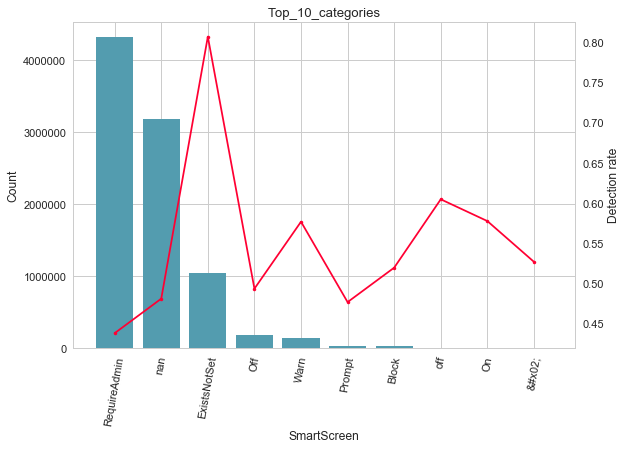

In [11]:
plot_category_feature(df_train,'SmartScreen', 10, sort=False)

In [12]:
BE_features = ['Processor', 'SmartScreen', 'AVProductStatesIdentifier', 'OrganizationIdentifier', 'Census_ActivationChannel']

binary_encode(df_train, BE_features[0], 'x64')
binary_encode(df_test, BE_features[0], 'x64')
metadata.loc[ BE_features[0] + "_BE_" + 'x64'] = ['input', True, df_train[BE_features[0]].dtype, True, 'binary']

binary_encode(df_train, BE_features[1], 'ExistsNotSet')
binary_encode(df_test, BE_features[1], 'ExistsNotSet')
metadata.loc[ BE_features[1] + "_BE_" + 'ExistsNotSet'] = ['input', True, df_train[BE_features[1]].dtype,  True, 'binary']

binary_encode(df_train, BE_features[2], 53447.0)
binary_encode(df_test, BE_features[2], 53447.0)
metadata.loc[ BE_features[2] + "_BE_" + '53447.0'] = ['input', True, df_train[BE_features[2]].dtype,  True, 'binary']

binary_encode(df_train, BE_features[3], 50)
binary_encode(df_test, BE_features[3], 50)
metadata.loc[ BE_features[3] + "_BE_" + '50'] = ['input', True, df_train[BE_features[3]].dtype,  True, 'binary']

binary_encode(df_train, BE_features[4], 'Volume:GVLK')
binary_encode(df_test, BE_features[4], 'Volume:GVLK')
metadata.loc[ BE_features[4] + "_BE_" + 'Volume:GVLK'] = ['input', True, df_train[BE_features[4]].dtype,  True, 'binary']

### 2.2.2 Numeric Encode

If the target rate of a categorical column tends to increase or decrease compared to all sorted values, we can use Numeric Encode. This encode is to treat category values like numeric. For example in case of AVProductsInstalled, as the category values increase the detection rate decreases. So I used Numeric encode for features like this.

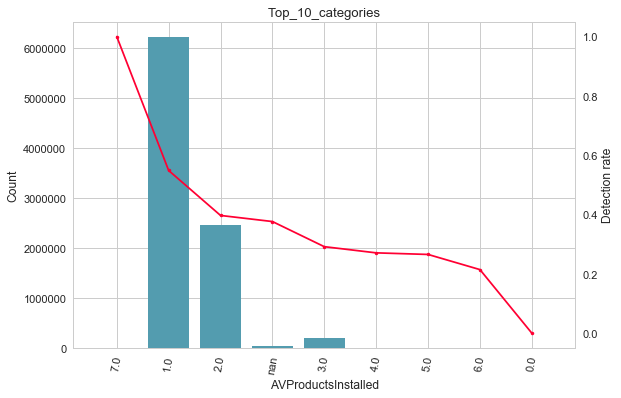

In [13]:
plot_category_feature(df_train, 'AVProductsInstalled', 10, sort=True) 

In [14]:
def numeric_encode(df, f):
    f_name = f+ "_NE"
    df[f_name] = df[f].astype(float)
    sd = np.std(df[f_name])
    mean = df[f_name].mean()
    df[f_name] = (df[f_name].fillna(mean) - mean) / sd  
    del df[f]

In [15]:
NE_features = ['Census_TotalPhysicalRAM', 'AVProductsInstalled', 'Census_ProcessorCoreCount']
for f in NE_features:
    numeric_encode(df_train, f)
    numeric_encode(df_test, f)
    metadata.loc[f,'keep'] = False
    metadata.loc[f+ "_NE"] = ['input', True, float, True,'numeric']

### 2.2.3. Frequency Encode

If there are many levels for a category variable, we can use Frequency Encode. This encode is to count how many times a specific value occurs within a category. I applied this way to version based features and geographical features. To make version features become time independent, frequency encode could help.  

In [16]:
def frequency_encode(df, f):
    df[f].fillna(df[f].mode()[0], inplace=True)
    d = df[f].value_counts(dropna=False)
    f_name = f+"_FE"
    df[f_name] = df[f].map(d)/d.max()
    del df[f]

In [17]:
FE_features = ['AvSigVersion', 'CountryIdentifier', 'CityIdentifier',
               'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Census_ProcessorModelIdentifier', 
               'Census_OSVersion', 'Census_OSBuildRevision', 
               'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier']
for f in FE_features:
    frequency_encode(df_train, f)
    frequency_encode(df_test, f)
    metadata.loc[f,'keep'] = False
    metadata.loc[f+ "_FE"] = ['input', True, float, True ,'numeric'] 

### 2.2.4. Factorize all features
I converted categorical data into numeric to be simple. I treated 'nan' as one category value. 

In [18]:
def factorize(df1, df2, f):
    d = pd.concat([df1[f], df2[f]], axis=0)
    d,_ = d.factorize(sort=True)       # nan = -1
    d += 1                             # nan = 0
    d = np.where(d==0, d.max()+1, d)   # make nan be largest label
    df1[f] = d[:len(df1)]
    df2[f] = d[len(df1):]
    del d

In [19]:
factorize_features = list(metadata[(metadata.new==False) & (metadata.keep==True)].index[:-2])
factorize_features.remove('AppVersion')
factorize_features.remove('EngineVersion')
factorize_features.remove('Census_SystemVolumeTotalCapacity')
factorize_features.remove('Census_PrimaryDiskTotalCapacity')

for f in factorize_features:
    factorize(df_train, df_test, f)

### 2.2.5. Category Encode 
Category Encode reduces the number of levels for all category variables. In this case, I delete levels that exceed blue dash line as shown below.

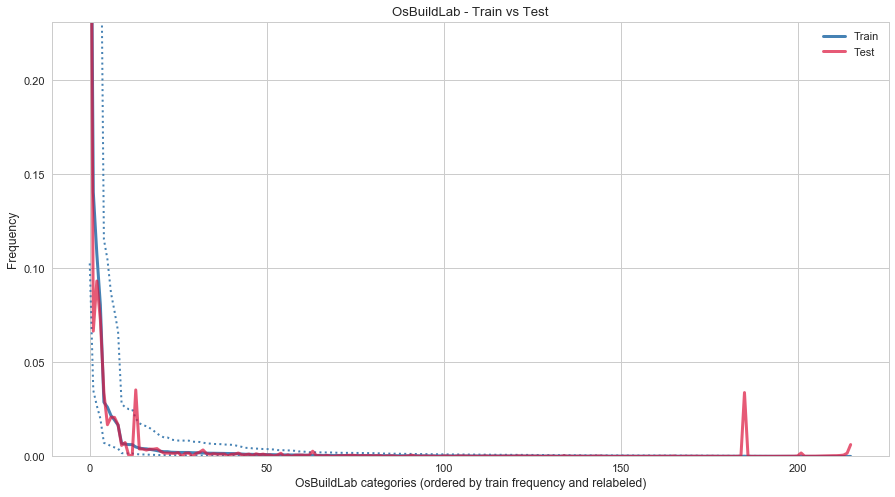

In [20]:
plot_compare(df_train, df_test, 'OsBuildLab', 4, 'Train vs Test','Train','Test',scale=0.5)

In [21]:
#I refer to functions made by Chris.  
def reduce_memory(df,f):
    mx = df[f].max()
    if mx < 256:
            df[f] = df[f].astype('uint8')
    elif mx < 65536:
        df[f] = df[f].astype('uint16')
    else:
        df[f] = df[f].astype('uint32')

def category_encode(df1, df2, f):
    d1 = pd.DataFrame(df1[f].value_counts().reset_index().rename({f:'train'},axis=1))
    d2 = pd.DataFrame(df2[f].value_counts().reset_index().rename({f:'test'},axis=1))
    d = pd.merge(d1, d2 , on='index', how='outer')

    rate = len(df2)/len(df1)
    d['train'].fillna(0,inplace=True)
    d['test'].fillna(0,inplace=True)

    d['remove'] = False
    d['remove'] = d['remove'] | (d['train'] < len(df1)/10000) 
    d['remove'] = d['remove'] | (rate*d['train'] < d['test']/3)
    d['remove'] = d['remove'] | (rate*d['train'] > 3*d['test'])

    d['new_index'] = d.apply(lambda x: x['index'] if x['remove']==False else 0, axis=1)
    d['new_index'],_ = d['new_index'].factorize(sort=True)
    d.set_index('index', inplace=True)
    cc = d['new_index'].to_dict()

    df1[f] = df1[f].map(cc)
    reduce_memory(df1,f)
    df2[f] = df2[f].map(cc)
    reduce_memory(df2,f)

In [22]:
CE = ['SmartScreen', 'AVProductStatesIdentifier', 'OrganizationIdentifier', 'Census_ActivationChannel',
      'RtpStateBitfield', 'DefaultBrowsersIdentifier', 'AVProductsEnabled', 'OrganizationIdentifier', 'Platform', 
      'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 
      'SkuEdition', 'IeVerIdentifier', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 
      'Census_ProcessorManufacturerIdentifier', 'Census_PrimaryDiskTypeName', 
      'Census_ChassisTypeName', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRoleName', 
      'Census_InternalBatteryType', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBranch', 
      'Census_OSBuildNumber', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier', 
      'Census_OSUILocaleIdentifier', 'Census_OSWUAutoUpdateOptionsName', 'Census_FlightRing', 'Census_FirmwareManufacturerIdentifier']

CE_features = list(set(CE) - set(remove_features))
for f in CE_features:
    category_encode(df_train, df_test, f)

In [23]:
print('Reducing memory...')
used_features = list(metadata[metadata.keep==True].index)
used_features.remove('Date')
used_features.remove('HasDetections')
used_features.remove('AppVersion')
used_features.remove('EngineVersion')
used_features.remove('Census_SystemVolumeTotalCapacity')
used_features.remove('Census_PrimaryDiskTotalCapacity')

for f in used_features: 
    reduce_memory(df_train, f)
for f in used_features: 
    reduce_memory(df_test, f)

Reducing memory...


## 2.3 Correlation Matrix
I confirmed features that have more than 0.7 of correlation each other and removed features that have correlation above 0.9.

In [24]:
corr = df_train[used_features].corr()
corr_yes = corr[(corr>0.7) | (corr <-0.7)]
del corr 

corr_yes_index = []
for i in range(0, corr_yes.shape[0]):
    for j in range(i+1, corr_yes.shape[0]):
        if (corr_yes.iloc[i,j] > 0.7) |  (corr_yes.iloc[i,j] < -0.7):
            corr_yes_index.append([i,j])
            
for i in range(0,len(corr_yes_index)):
    print([corr_yes.index[corr_yes_index[i][0]],corr_yes.index[corr_yes_index[i][1]]], round(corr_yes.iloc[corr_yes_index[i][0],corr_yes_index[i][1]],3))

['AVProductStatesIdentifier', 'AVProductsInstalled_NE'] -0.73
['Platform', 'OsVer'] 0.989
['Processor', 'Census_OSArchitecture'] 0.989
['Processor', 'Processor_BE_x64'] -0.999
['OsBuild', 'OsBuildLab'] 0.831
['OsBuild', 'Census_OSBuildNumber'] 0.928
['OsSuite', 'SkuEdition'] -0.886
['OsSuite', 'Census_OSEdition'] -0.927
['OsSuite', 'Census_OSSkuName'] -0.928
['OsPlatformSubRelease', 'Census_OSBranch'] 0.831
['OsBuildLab', 'Census_OSBuildNumber'] 0.794
['SkuEdition', 'Census_OSEdition'] 0.868
['SkuEdition', 'Census_OSSkuName'] 0.868
['IeVerIdentifier', 'Census_OSBuildNumber'] 0.73
['Census_MDC2FormFactor', 'Census_ChassisTypeName'] 0.707
['Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical'] 0.905
['Census_InternalBatteryType', 'Census_ThresholdOptIn'] 0.807
['Census_InternalBatteryType', 'Census_IsWIMBootEnabled'] 0.806
['Census_OSArchitecture', 'Processor_BE_x64'] -0.989
['Census_OSEdition', 'Census_OSSkuName'] 0.999
['Census_OSInstall

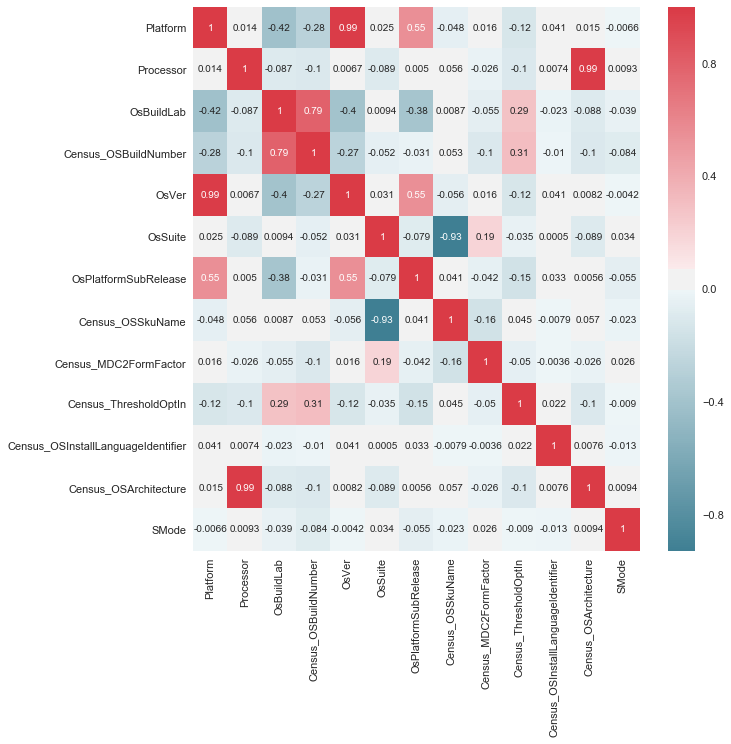

In [25]:
corr_remove = ['Platform', 'Processor', 'OsBuildLab', 'Census_OSBuildNumber', 'OsVer',
               'OsSuite', 'OsPlatformSubRelease','Census_OSSkuName', 'Census_MDC2FormFactor', 'Census_ThresholdOptIn',
               'Census_OSInstallLanguageIdentifier','Census_OSArchitecture', 'SMode']

f, ax = plt.subplots(figsize=(10,10))
corr = df_train[corr_remove].corr()
sns.heatmap(corr, annot=True ,cmap = sns.diverging_palette(220,10,as_cmap=True))
plt.show()

In [26]:
for f in corr_remove:
    del df_train[f]
    del df_test[f]
    metadata.loc[f,'keep'] = False

## 2.4 Crating new features 
I refered to Chris for Hard_Ratio_for_OS. 

### 1. EngineVersion3
EngineVersion indicates Defender state information. EngineVersion3 is third number from EngineVersion.

### 2. AppVersion2
AppVersion indicates whether your Windows Defender is up to date.  AppVersion2 is the second number from AppVersion.
 
### 3.  Lag_from_Start
Lag_from_Start is the difference between AvSigVersion_Date and July 26, 2018 (train) and September 27, 2018 (test). 


### 4. Hard_Ratio_for_OS
Hard_Ratio_for_OS is the ratio of the size of partition for the operating system with the total hard drive. Savvy users install multiple operating systems and have a lower ratio. I expect Savvy users have smaller detection rate than normal users.

In [27]:
# 1. EngineVersion3
df_train['EngineVersion'].fillna(df_train['EngineVersion'].mode()[0], inplace=True)
df_test['EngineVersion'].fillna(df_test['EngineVersion'].mode()[0], inplace=True)

df_train['EngineVersion3'] = df_train['EngineVersion'].map(lambda x: np.int(x.split('.')[2]))
df_test['EngineVersion3'] = df_test['EngineVersion'].map(lambda x: np.int(x.split('.')[2]))
metadata.loc['EngineVersion3'] = ['input', True, df_train['EngineVersion3'].dtype, True , 'category']

# remove 
metadata.loc['EngineVersion', 'keep'] = False
del df_train['EngineVersion']
del df_test['EngineVersion']


# 2. AppVersion2
df_train['AppVersion'].fillna(df_train['AppVersion'].mode()[0], inplace=True)
df_test['AppVersion'].fillna(df_test['AppVersion'].mode()[0], inplace=True)

df_train['AppVersion2'] = df_train['AppVersion'].map(lambda x: np.int(x.split('.')[1]))
df_test['AppVersion2'] = df_test['AppVersion'].map(lambda x: np.int(x.split('.')[1]))
metadata.loc['AppVersion2'] = ['input', True, df_train['AppVersion2'].dtype, True , 'category']
 
# remove 
metadata.loc['AppVersion', 'keep'] = False
del df_train['AppVersion']
del df_test['AppVersion']

# 3. Lag_from_Start
df_train['Lag_from_Start'] = datetime(2018,7,26) - df_train['Date']
df_train['Lag_from_Start'] = df_train['Lag_from_Start'].map(lambda x: x.days//1)
df_train.loc[df_train['Lag_from_Start'] <0, 'Lag_from_Start'] = 0
df_train['Lag_from_Start'] = df_train['Lag_from_Start'].astype('float32')

df_test['Lag_from_Start'] = datetime(2018,9,27) - df_test['Date']  
df_test['Lag_from_Start'] = df_test['Lag_from_Start'].map(lambda x: x.days//1)
df_test.loc[ df_test['Lag_from_Start'] <0, 'Lag_from_Start' ] = 0
df_test['Lag_from_Start'] = df_test['Lag_from_Start'].astype('float32') 
metadata.loc['Lag_from_Start'] = ['input', True, df_train['Lag_from_Start'].dtype, True ,'numeric']

# 4. Hard_Ratio_for_OS
df_train['Hard_Ratio_for_OS'] = df_train['Census_SystemVolumeTotalCapacity'].astype('float')/df_train['Census_PrimaryDiskTotalCapacity'].astype('float')
df_train['Hard_Ratio_for_OS'] = df_train['Hard_Ratio_for_OS'].astype('float32')

df_test['Hard_Ratio_for_OS'] = df_test['Census_SystemVolumeTotalCapacity'].astype('float')/ df_test['Census_PrimaryDiskTotalCapacity'].astype('float')
df_test['Hard_Ratio_for_OS'] = df_test['Hard_Ratio_for_OS'].astype('float32')
metadata.loc['Hard_Ratio_for_OS'] = ['input', True, df_train['Hard_Ratio_for_OS'].dtype, True, 'numeric']

# remove 
metadata.loc['Census_SystemVolumeTotalCapacity', 'keep'] = False
del df_train['Census_SystemVolumeTotalCapacity']
del df_test['Census_SystemVolumeTotalCapacity']

metadata.loc['Census_PrimaryDiskTotalCapacity', 'keep'] = False
del df_train['Census_PrimaryDiskTotalCapacity']
del df_test['Census_PrimaryDiskTotalCapacity']


## 3. Second EDA 
<a id="eda"></a>
## 3.1 checking the quality of features

Here, I did second EDA for checking whether the results of feature engineering is good or not.  
Especially, I concentrated on the features of  case(1) and case(3) which are confirmed in Notebook1.

(1) time independent features & train and test are different.       
(3) time dependent features & train and test are different.      

To do this, I divided test data into dt_test1 which is before (2018,11,1) and df_test2 which is after (2018,11,1). 

In [28]:
df_test1 = df_test[(df_test['Date'] < datetime(2018,11,1))]
df_test2 = df_test[ df_test['Date'] >=  datetime(2018,11,1)]

In [29]:
print('df_test1: ', df_test1.shape)
print('df_test2: ', df_test2.shape)

df_test1:  (5791555, 63)
df_test2:  (2061631, 63)


In [30]:
#(1) time independent features & train and test are different. 
time_indep_diff = ['DefaultBrowsersIdentifier', 'CountryIdentifier_FE', 'CityIdentifier_FE','GeoNameIdentifier_FE', 'LocaleEnglishNameIdentifier_FE',
                   'Processor', 'OsBuild', 'OsPlatformSubRelease', 'OsBuildLab', 'IeVerIdentifier', 'Census_ProcessorModelIdentifier_FE',
                   'Census_SystemVolumeTotalCapacity', 'Census_OSArchitecture', 'Census_OSBranch','Census_OSBuildNumber', 'Census_OSInstallTypeName',
                   'Census_FirmwareVersionIdentifier_FE']

#(3) time dependent features & train and test are different. 
time_dep_diff = ['AppVersion2','EngineVersion3','AvSigVersion_FE','Census_OSVersion_FE','Census_OSBuildRevision_FE']

metadata_True = metadata.loc[(metadata.keep==True)].index
time_indep_diff = set(time_indep_diff) & set(metadata_True)  
time_dep_diff = set(time_dep_diff) & set(metadata_True)  

### Case (1) - Time independent features & train and test are different. 
After feature engineering, the train and test become similar except some features.

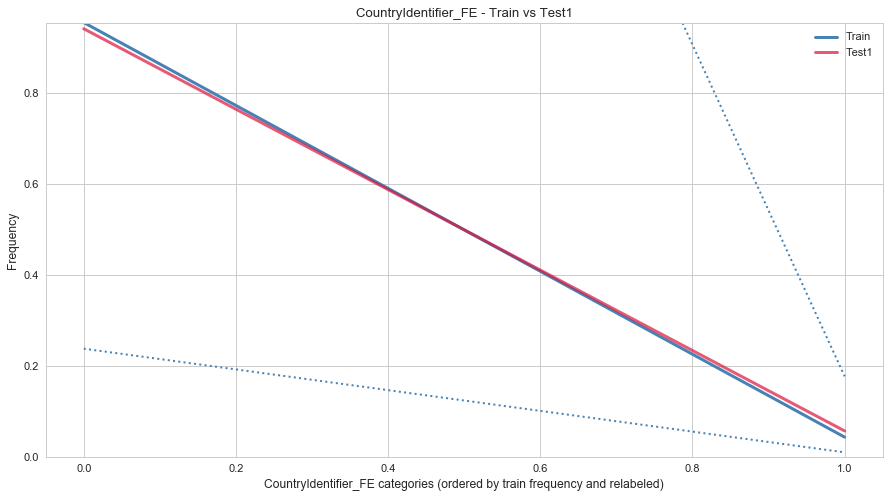

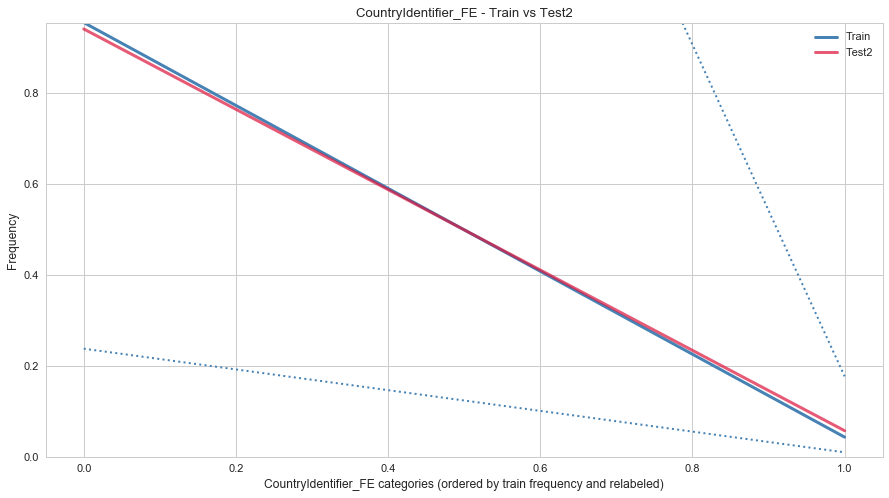

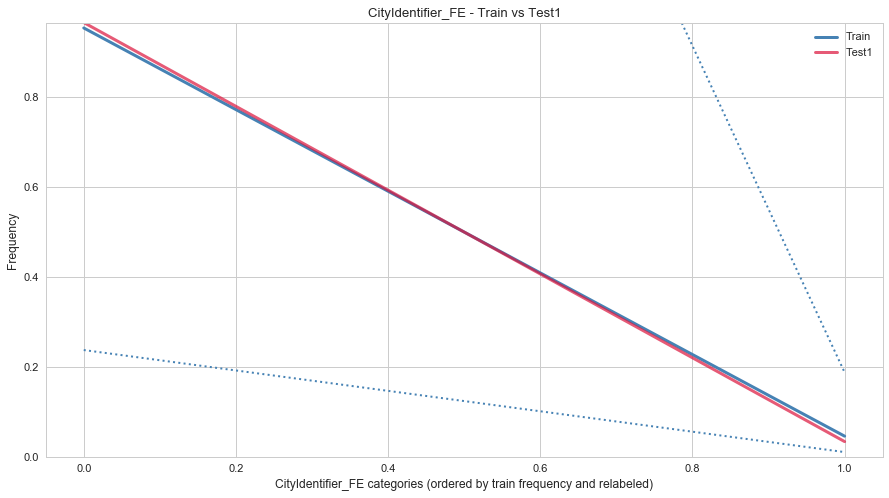

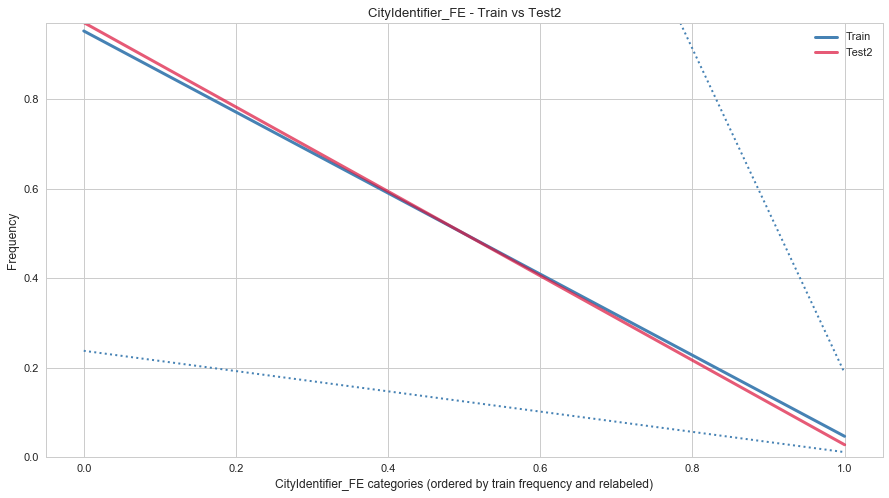

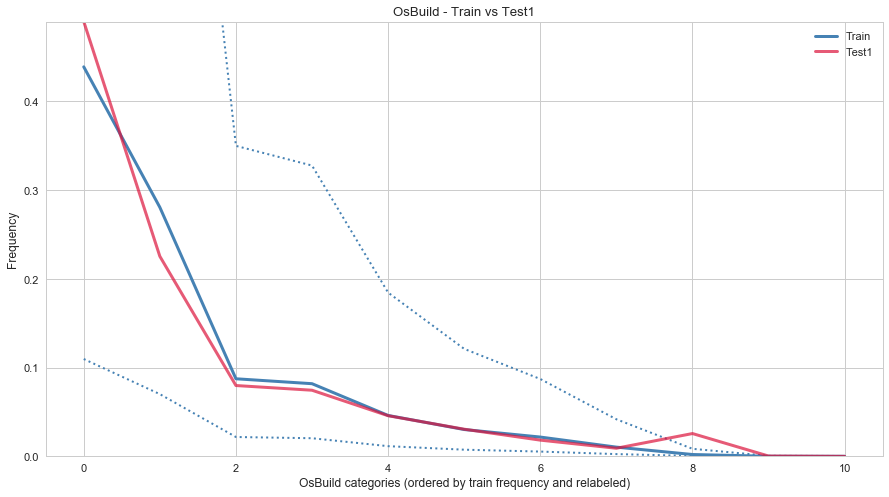

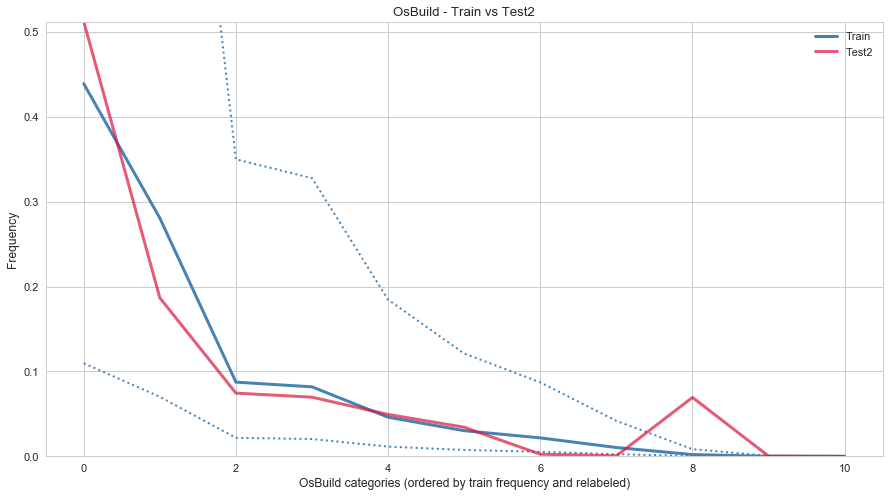

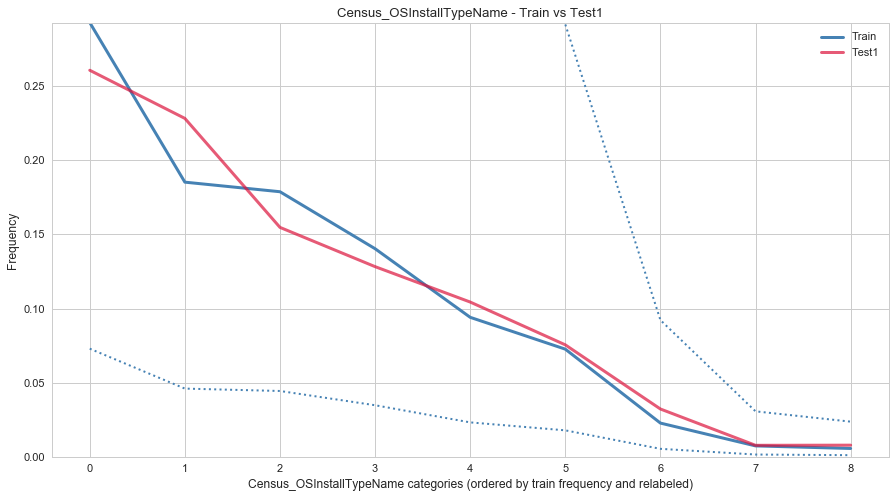

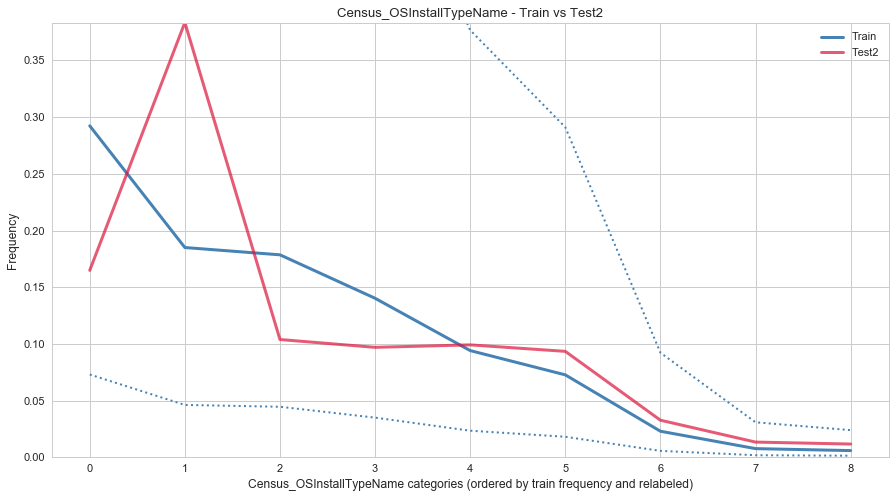

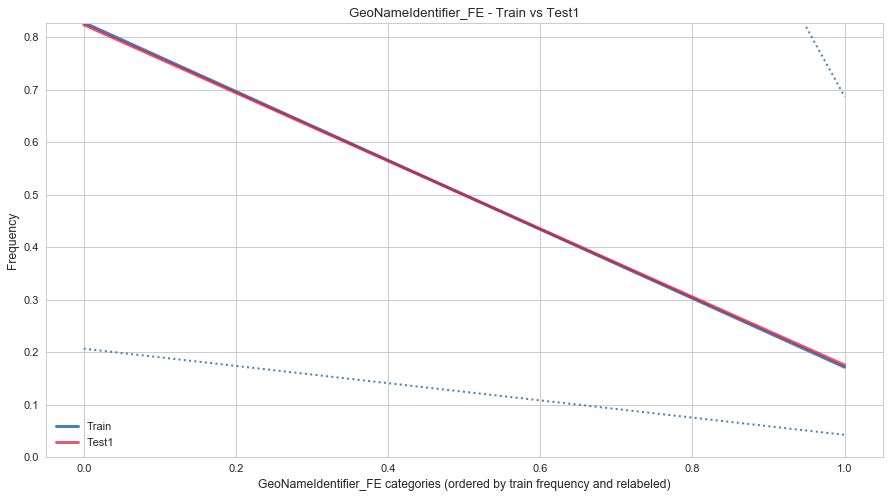

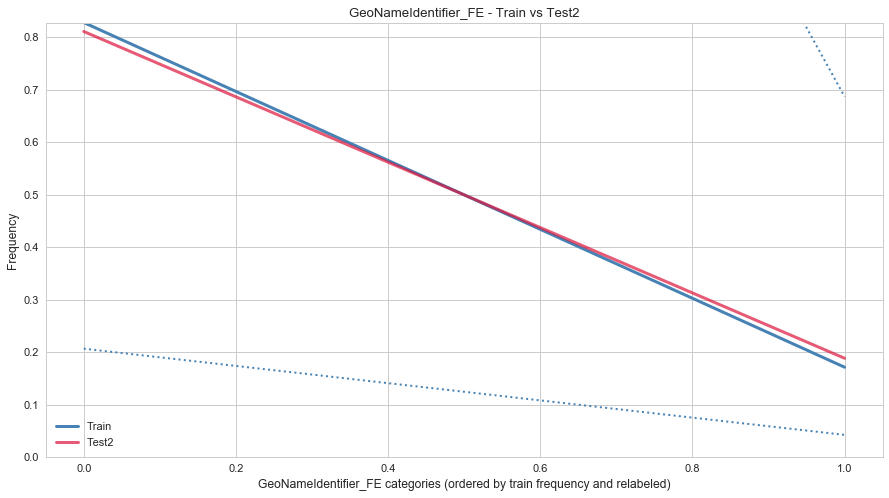

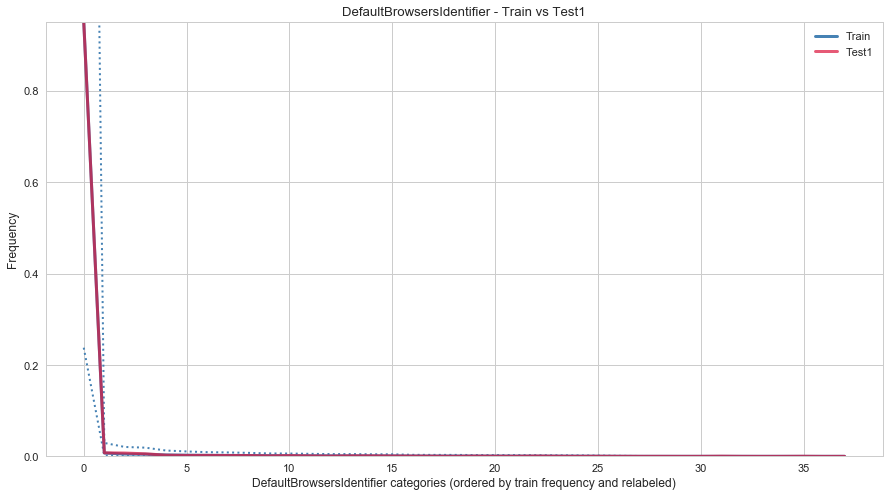

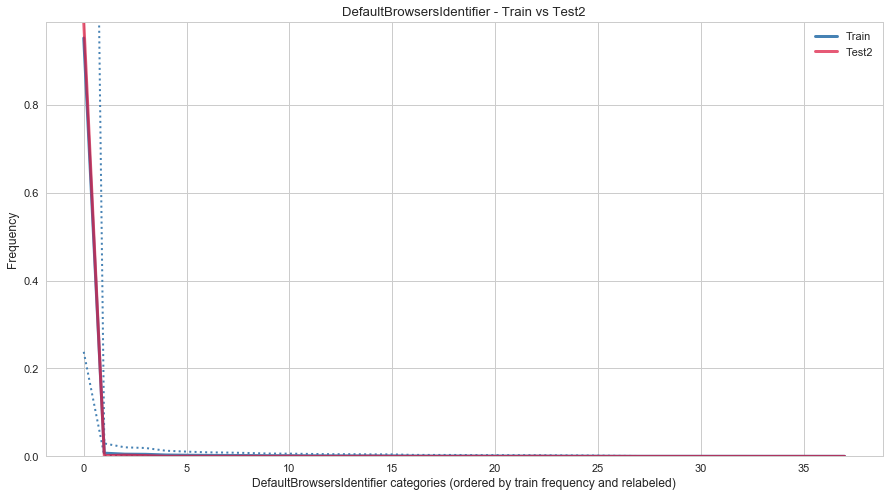

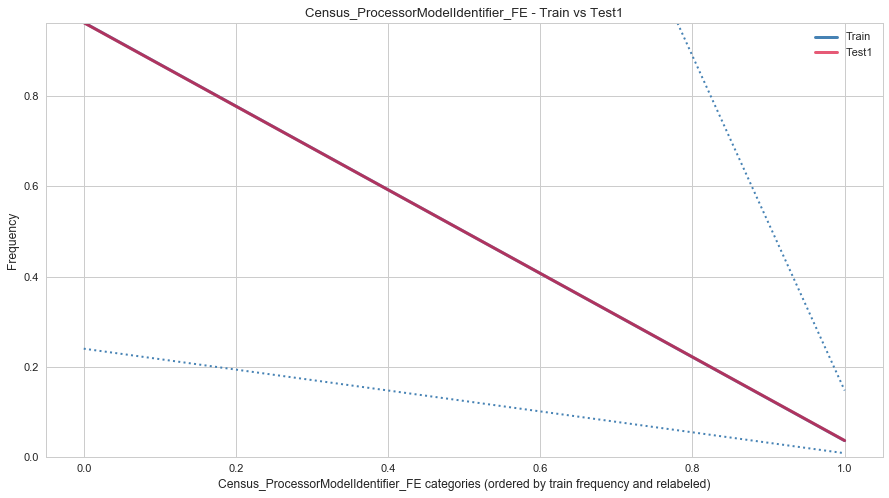

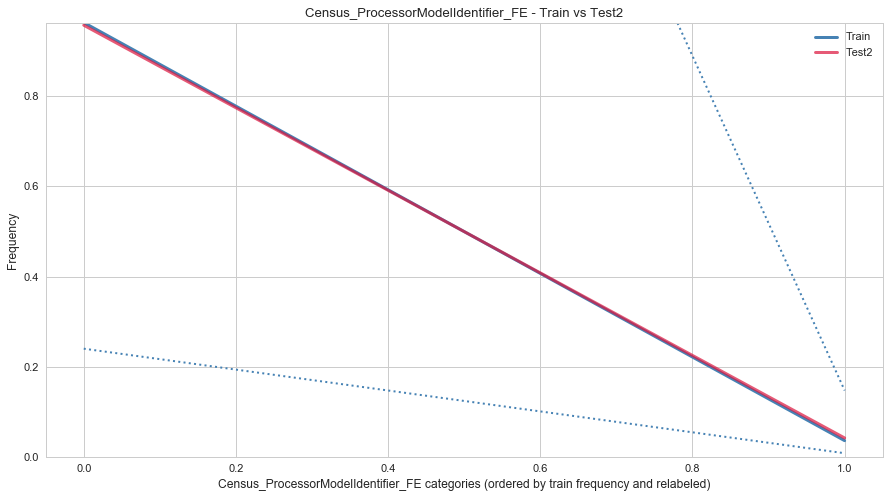

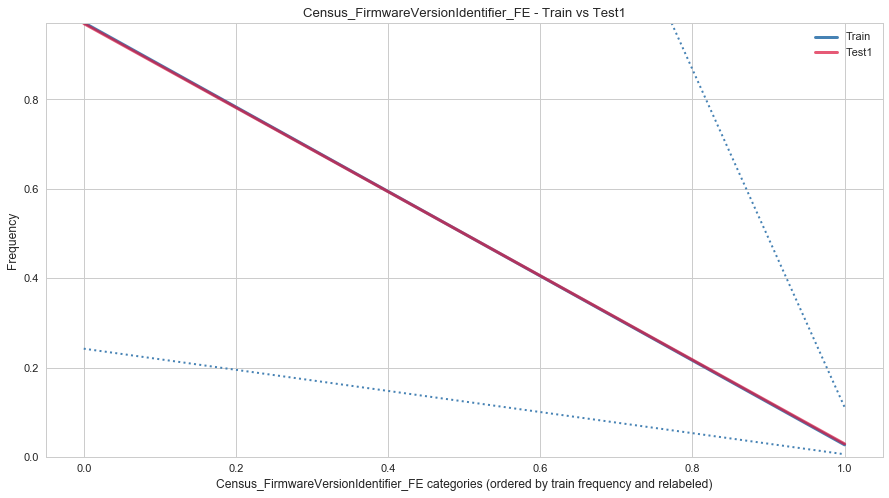

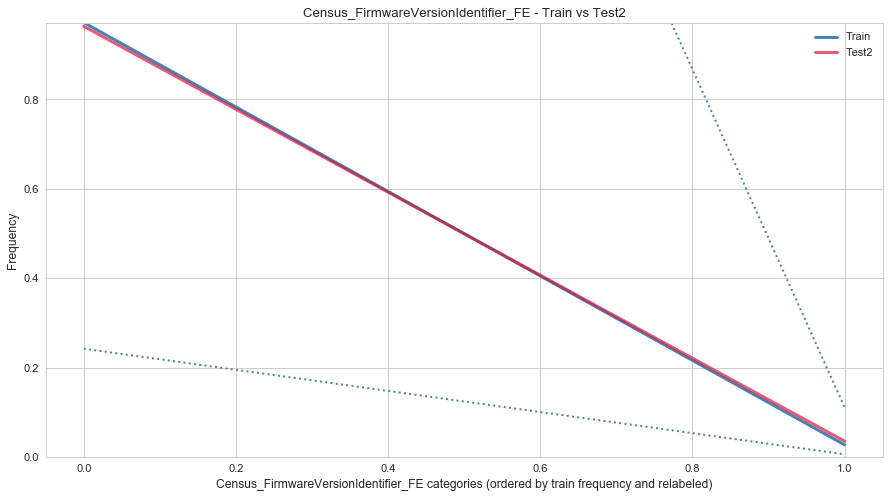

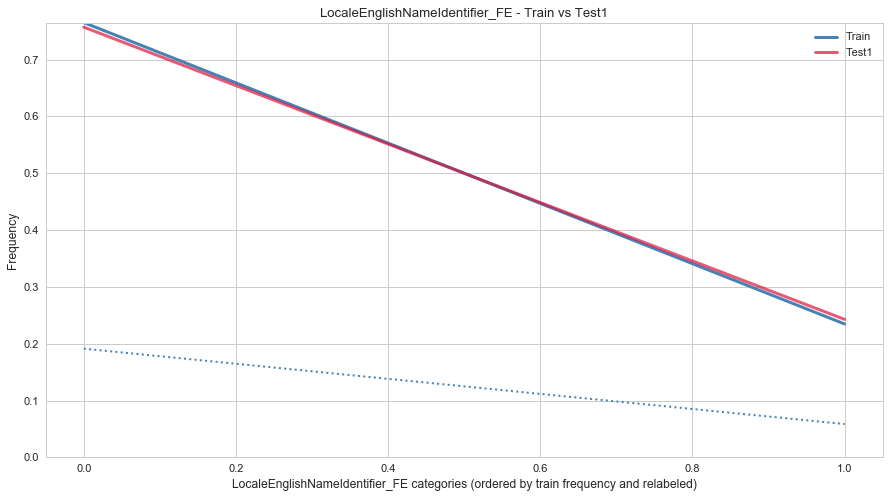

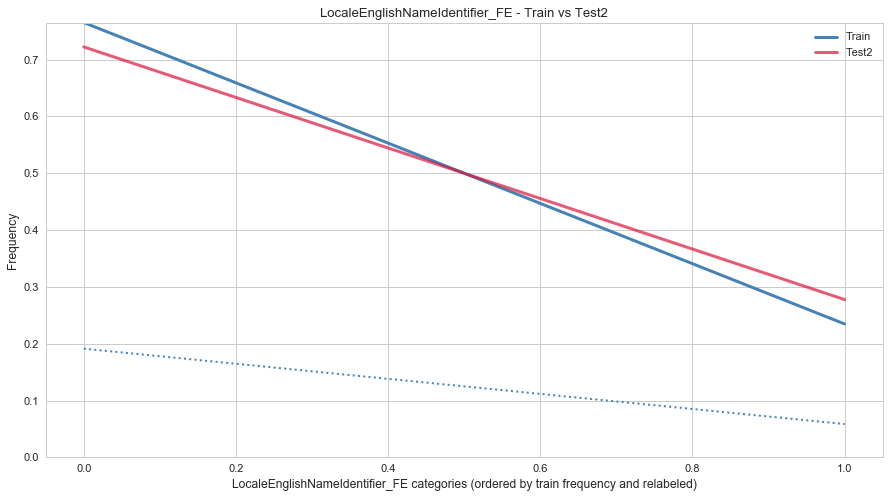

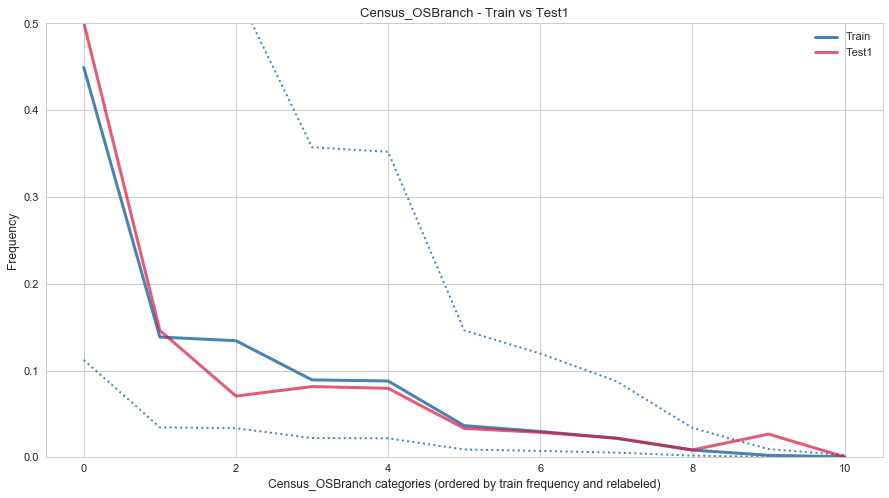

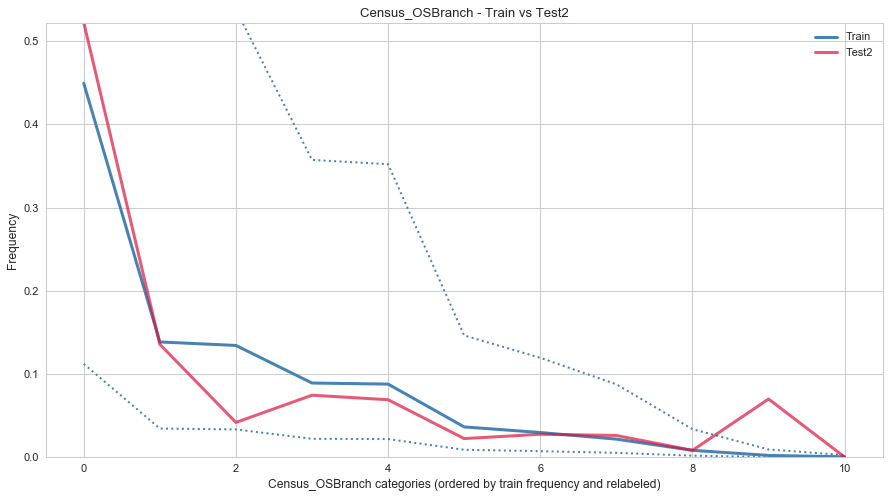

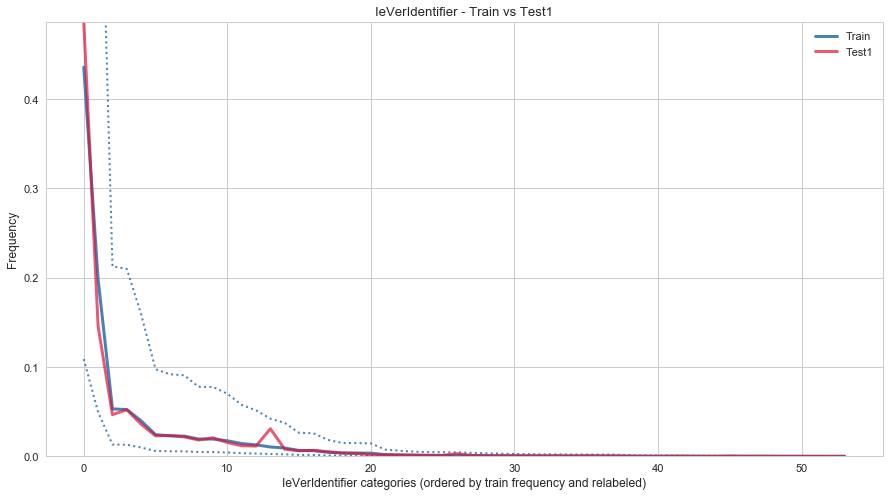

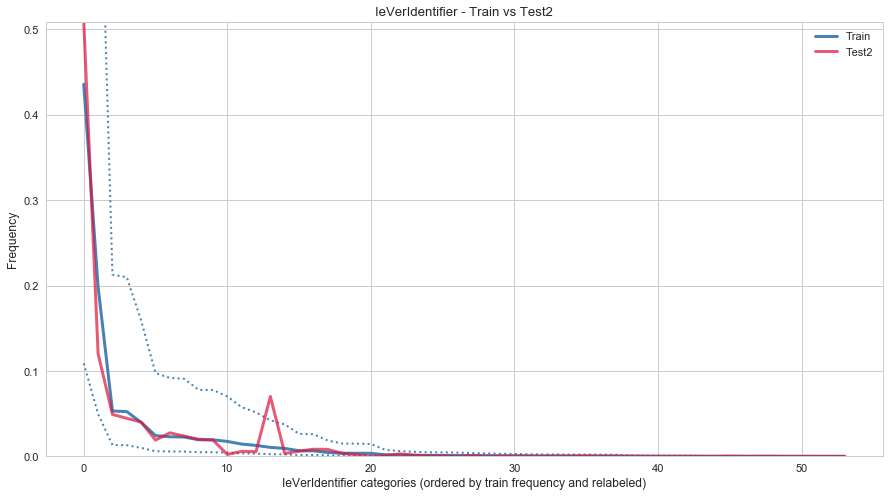

In [31]:
for f in time_indep_diff :
    plot_compare(df_train, df_test1, f, 4, 'Train vs Test1', 'Train', 'Test1', scale=1)
    plot_compare(df_train, df_test2, f, 4, 'Train vs Test2', 'Train', 'Test2', scale=1)

### Case (3) -  Time dependent features & train and test are different. 
After feature engineering, the features become time independent and train and test are similar except Engineversion3. 

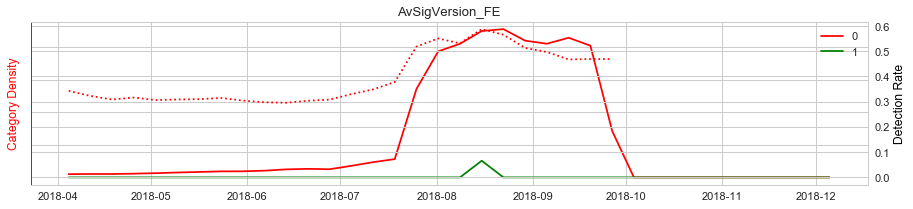

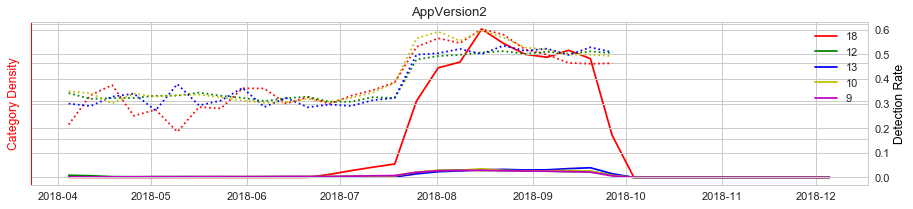

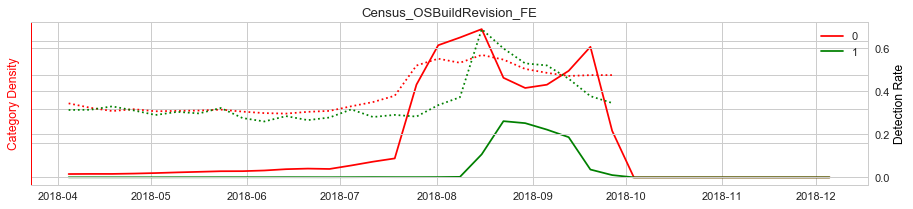

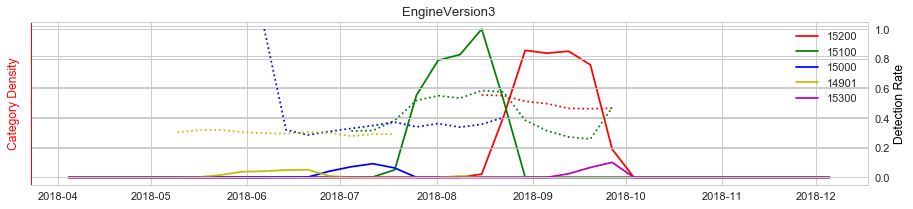

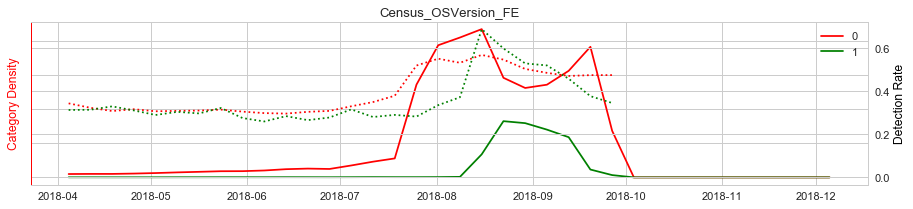

In [32]:
for f in time_dep_diff :
    dynamicPlot(df_train,f, title=f)

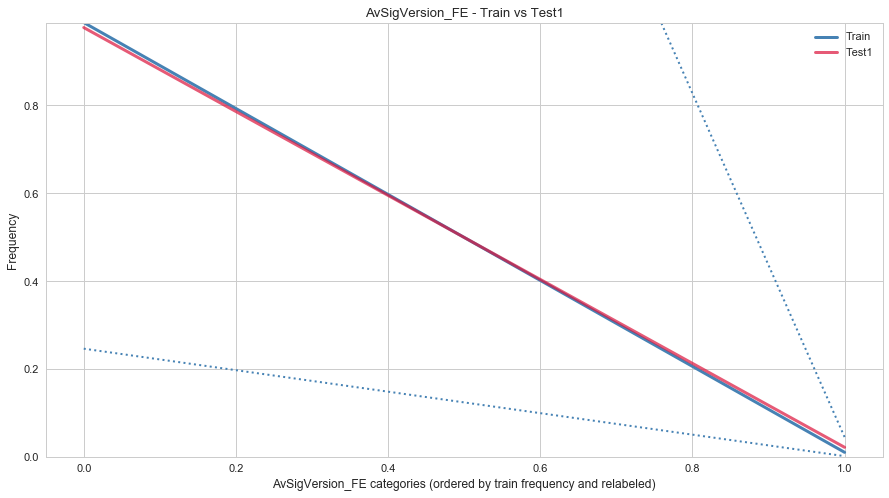

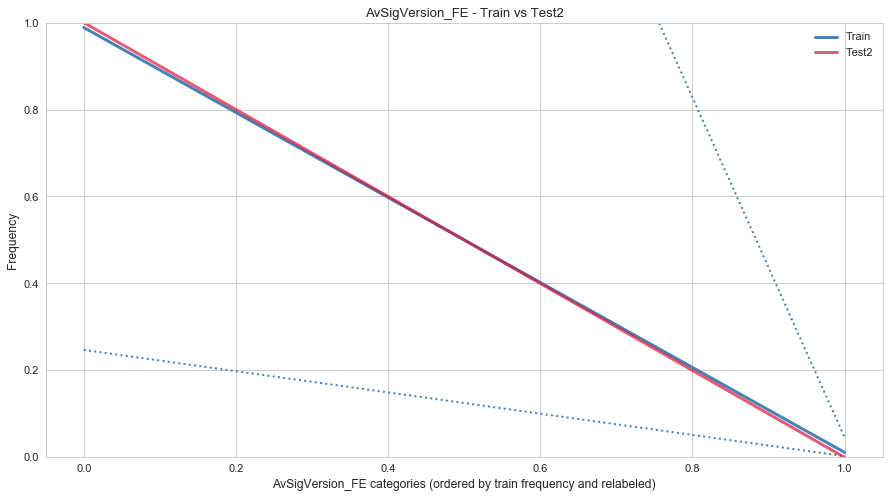

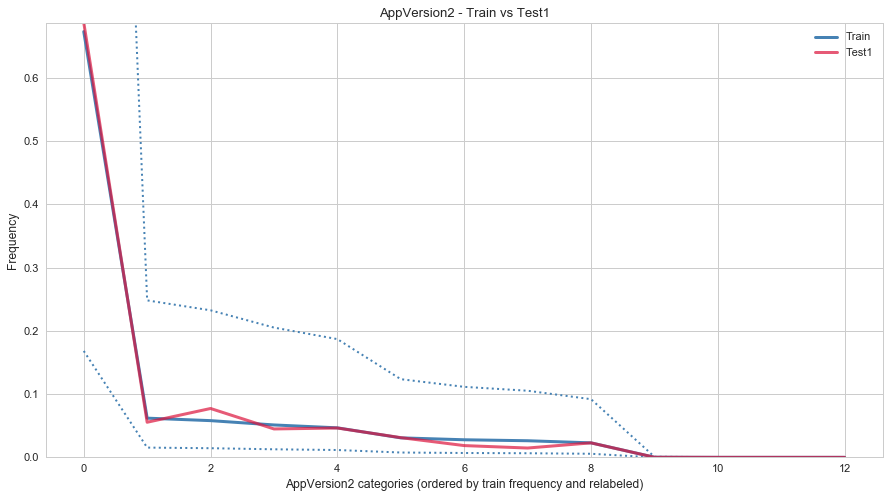

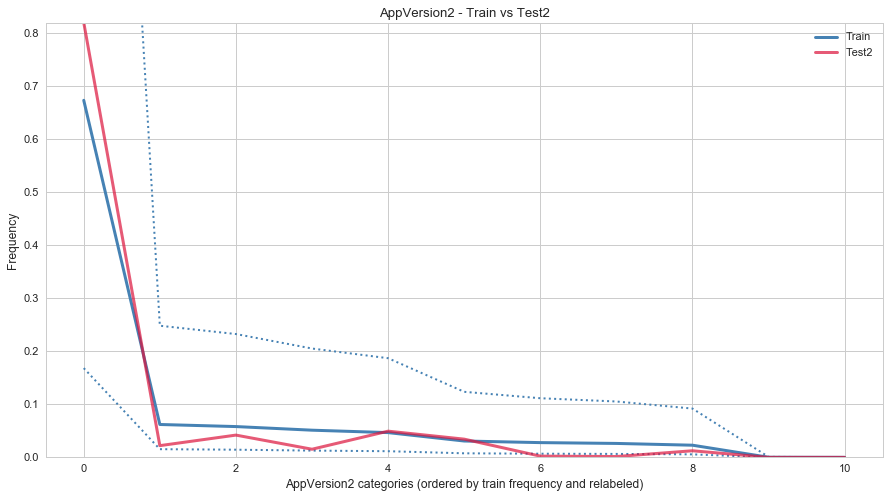

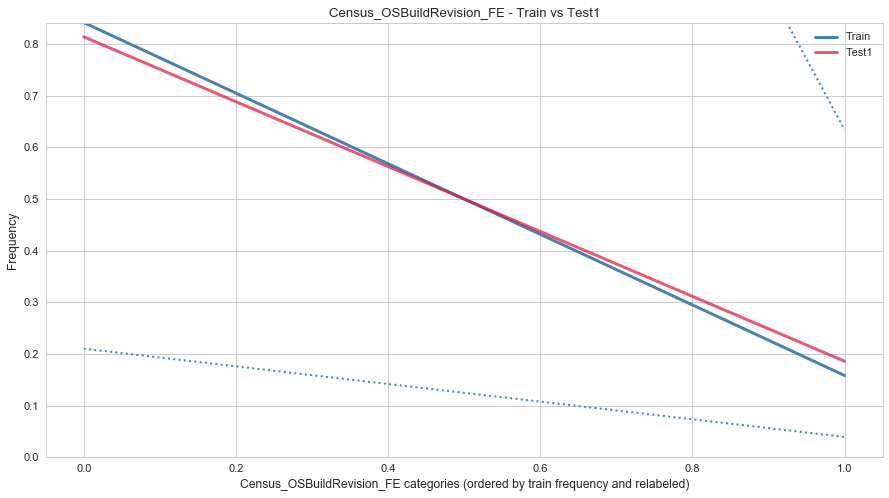

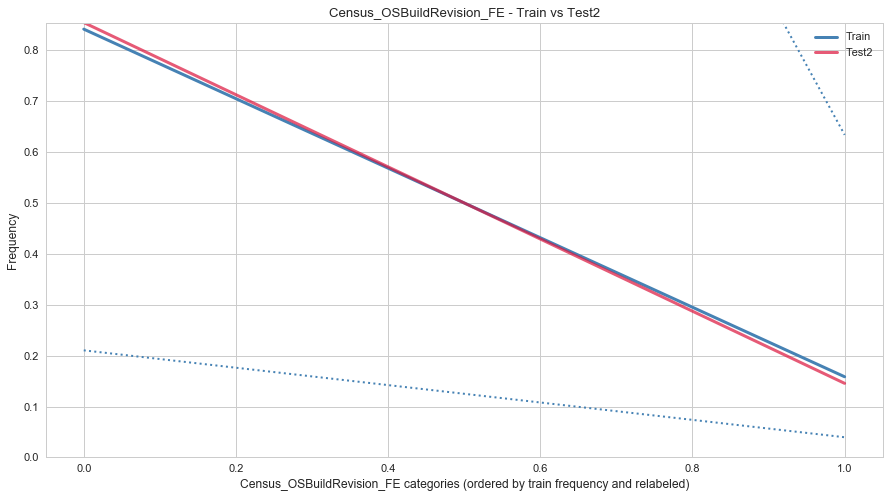

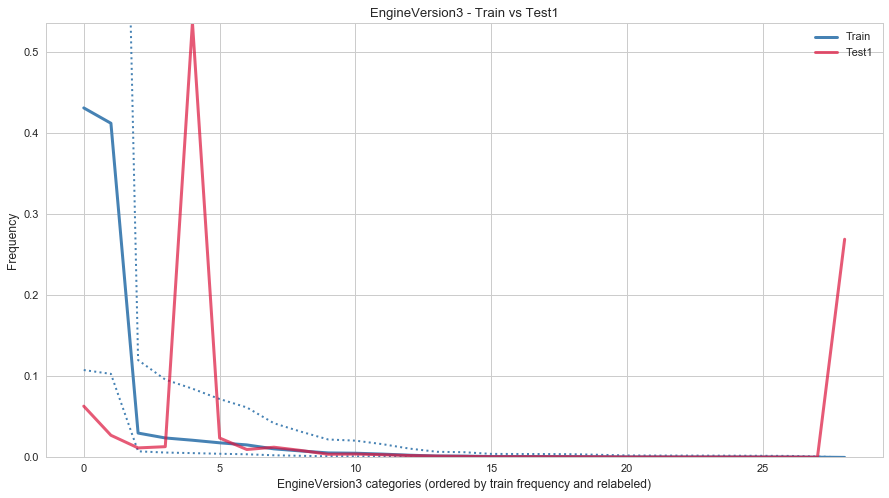

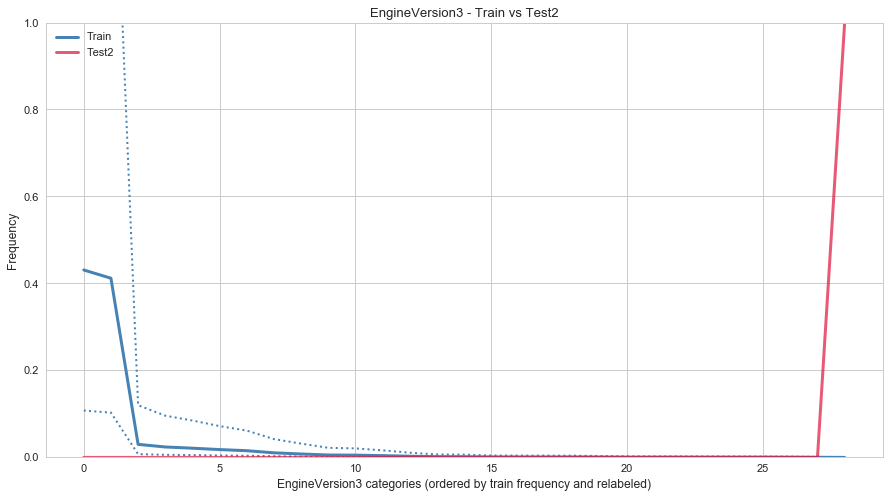

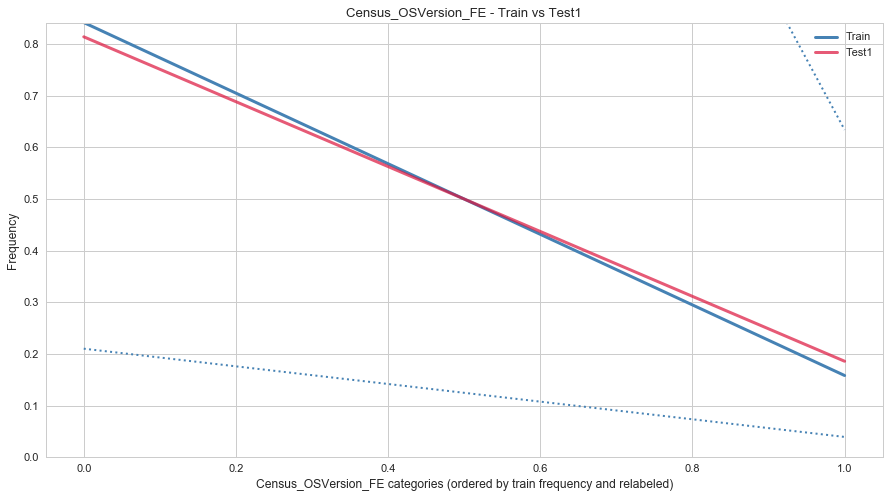

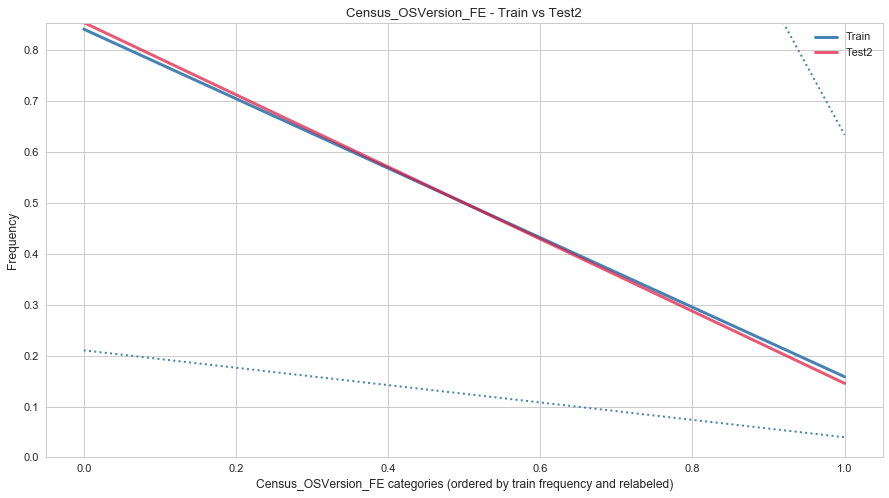

In [33]:
for f in time_dep_diff :
    plot_compare(df_train, df_test1, f, 4, 'Train vs Test1', 'Train', 'Test1', scale=1)
    plot_compare(df_train, df_test2, f, 4, 'Train vs Test2', 'Train', 'Test2', scale=1)

## 3.2 Finally removed features 
Finally I removed some features that are totally different between Train and Test.

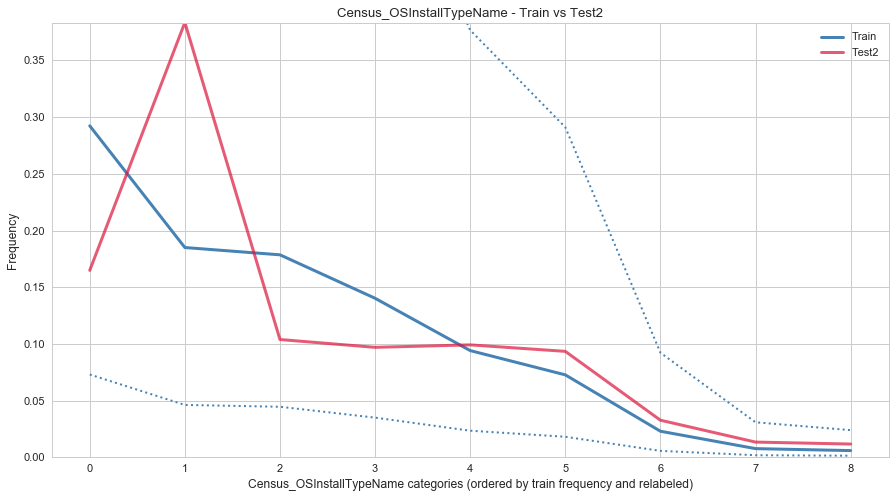

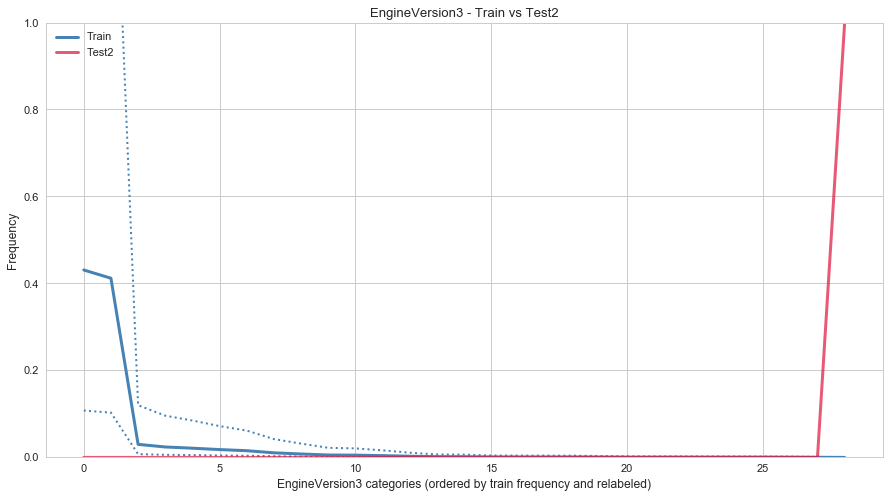

In [34]:
plot_compare(df_train, df_test2, 'Census_OSInstallTypeName', 4, 'Train vs Test2', 'Train', 'Test2', scale=1)
plot_compare(df_train, df_test2,'EngineVersion3', 4, 'Train vs Test2', 'Train', 'Test2', scale=1)

In [35]:
remove1 = [ 'Census_OSInstallTypeName','EngineVersion3']
for f in remove1:
    del df_train[f]
    del df_test[f]
    metadata.loc[f,'keep'] = False

There is another problem caused by data that is in test but not in train like 'OsBuild' and 'Census_OSBranch'.  
So I removed these features.

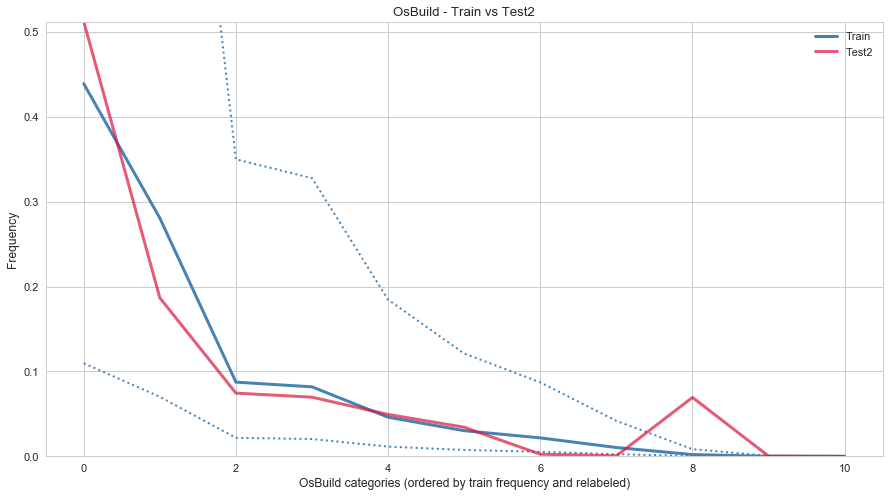

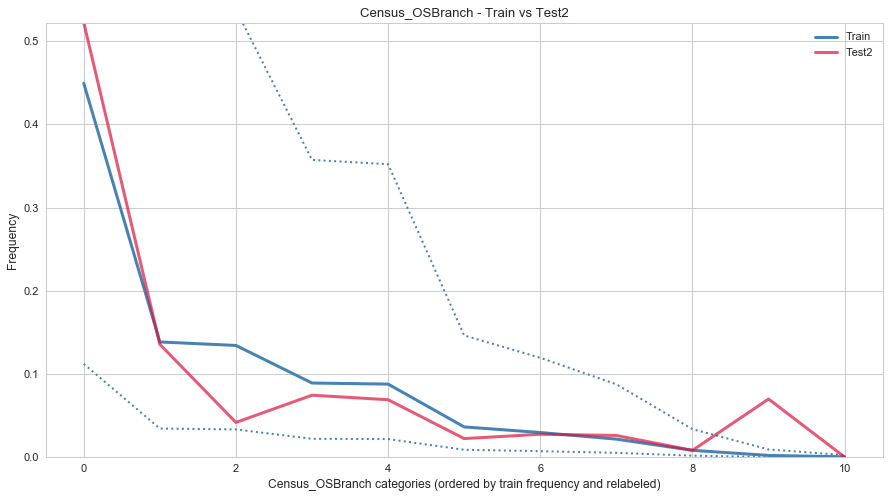

In [36]:
plot_compare(df_train, df_test2, 'OsBuild', 4, 'Train vs Test2', 'Train', 'Test2', scale=1)
plot_compare(df_train, df_test2, 'Census_OSBranch', 4, 'Train vs Test2', 'Train', 'Test2', scale=1)

In [37]:
remove2 = ['Census_OSBranch', 'OsBuild']
for f in remove2:
    del df_train[f]
    del df_test[f]
    metadata.loc[f,'keep'] = False

In [38]:
df_train.to_csv('C:/Users/dj.lee/Desktop/data/train/train_preprocessing.csv', index=False)
df_test.to_csv('C:/Users/dj.lee/Desktop/data/test/test_preprocessing.csv', index=False)